In [180]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import rowgenerators as rg
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [183]:
#pkg = mp.jupyter.open_package()
pkg = mp.jupyter.open_source_package()
pkg

# Safegraph Patterns Data
`safegraph.com-patterns-1.1.1` Last Update: 2021-09-29T15:37:57

__




 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)


## References
<ul><li> <strong>sdsm-patterns-202106</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_06-2021-09-29.zip#patterns.csv</em>. </li><li> <strong>sdsm-visit-202106</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_06-2021-09-29.zip#visit_panel_summary.csv</em>. </li><li> <strong>sdsm-norm-202106</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_06-2021-09-29.zip#normalization_stats.csv</em>. </li><li> <strong>sdsm-home-202106</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_06-2021-09-29.zip#home_panel_summary.csv</em>. </li><li> <strong>sdsm-patterns-202107</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_07-2021-09-29.zip#patterns.csv</em>. </li><li> <strong>sdsm-visit-202107</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_07-2021-09-29.zip#visit_panel_summary.csv</em>. </li><li> <strong>sdsm-norm-202107</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_07-2021-09-29.zip#normalization_stats.csv</em>. </li><li> <strong>sdsm-home-202107</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_07-2021-09-29.zip#home_panel_summary.csv</em>. </li><li> <strong>sdsm-patterns-202108</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_08-2021-09-29.zip#patterns.csv</em>. </li><li> <strong>sdsm-visit-202108</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_08-2021-09-29.zip#visit_panel_summary.csv</em>. </li><li> <strong>sdsm-norm-202108</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_08-2021-09-29.zip#normalization_stats.csv</em>. </li><li> <strong>sdsm-home-202108</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-PATTERNS-2021_08-2021-09-29.zip#home_panel_summary.csv</em>. </li><li> <strong>sdsm_brands</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-CORE_POI-2021_08-2021-09-29.zip#brand_info.csv</em>. </li><li> <strong>sdsm_poi</string>, <em>data/SanDiego-Carlsbad-SanMarcosCAMSA-7224-722513-447110-CORE_POI-2021_08-2021-09-29.zip#core_poi.csv</em>. </li><ul>

In [ ]:
bg = rg.geoframe("censusgeo://CA/blockgroup")

In [185]:
poi = pkg.reference('sdsm_poi').dataframe()

In [29]:
from collections import defaultdict 
frames = defaultdict(list)

for r in pkg.references():
    _, group, date = r.name.split('-')
    frames[group].append(r.dataframe())
    

In [149]:
def make_geoid(cbg):
    try:
        return '15000US'+cbg.astype('str').str.zfill(12)
    except AttributeError:
        return '15000US'+cbg.zfill(12)

make_geoid('foobar')

'15000US000000foobar'

In [132]:

    
pat = pd.concat(frames['patterns'])
pat['geoid'] = make_geoid(pat.poi_cbg)

visit = pd.concat(frames['visit'])
norm = pd.concat(frames['norm'])
home = pd.concat(frames['home'])

# Home

In [112]:
home['census_block_group'] = home.census_block_group.astype('str').str.zfill(12)
home['geoid'] = make_geoid(home.census_block_group)
home_m = home.groupby(['geoid'])[['number_devices_residing', 'number_devices_primary_daytime']].mean().reset_index()

In [92]:
home_sd = home_m[home_m.geoid.str.startswith('15000US06073')] # Select San Diego County
home_sd = bg[['geoid', 'aland','geometry']].merge(home_sd)

In [93]:
home_sd['device_ratio'] = home_sd.number_devices_primary_daytime / home_sd.number_devices_residing


<AxesSubplot:>

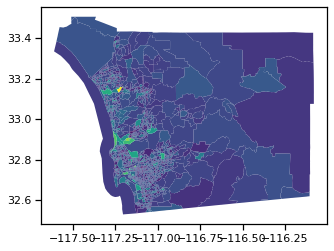

In [96]:
home_sd.to_file("san_diego_home.geojson", driver='GeoJSON')
home_sd.plot(column='device_ratio')


# Visits


In [260]:
pat.head().T

,0,1,2,3,4
placekey,zzw-22c@5z5-pmb-sqz,zzw-224@5z5-q59-7qz,222-222@5z5-px6-jsq,22k-223@5z5-t2b-sqz,225-225@5z5-qf4-75z
parent_placekey,zzw-225@5z5-pmb-swk,222-226@5z5-q59-7kf,NaN,223-222@5z5-t2b-tgk,NaN
location_name,Main Chick Hot Chicken,Ike's Love & Sandwiches,The Hurtlocker,Cold Stone Creamery,Bar Moxy
street_address,4705 Clairemont Dr Ste H,3625 Midway Dr Ste A20,1554 Black Lion Ct,708 Center Dr Ste 101,831 6th Ave
city,San Diego,San Diego,San Diego,San Marcos,San Diego
region,CA,CA,CA,CA,CA
postal_code,92117,92110,92126,92069,92101
safegraph_brand_ids,NaN,SG_BRAND_acdff8742126a4c2,NaN,SG_BRAND_677f765d7f255c69e00500b3ceb29eff,NaN
brands,NaN,Ike's Love & Sandwiches,NaN,Cold Stone Creamery,NaN
date_range_start,2021-06-01T00:00:00-07:00,2021-06-01T00:00:00-07:00,2021-06-01T00:00:00-07:00,2021-06-01T00:00:00-07:00,2021-06-01T00:00:00-07:00


In [287]:
poipat = pat.merge(poi[['placekey', 'top_category','sub_category', 'naics_code','latitude','longitude']])
poipat['geometry'] = gpd.points_from_xy(poipat.longitude, poipat.latitude, crs="EPSG:4326")
poipat = gpd.GeoDataFrame(poipat)
poipat['year'] = pd.to_datetime(poipat.date_range_start).dt.year
poipat['month'] = pd.to_datetime(poipat.date_range_start).dt.month
poipat['date'] = pd.to_datetime(poipat.date_range_start).dt.date

poipat.head().T

,0,1,2,3,4
placekey,zzw-22c@5z5-pmb-sqz,zzw-22c@5z5-pmb-sqz,zzw-22c@5z5-pmb-sqz,zzw-224@5z5-q59-7qz,zzw-224@5z5-q59-7qz
parent_placekey,zzw-225@5z5-pmb-swk,zzw-225@5z5-pmb-swk,zzw-225@5z5-pmb-swk,222-226@5z5-q59-7kf,222-226@5z5-q59-7kf
location_name,Main Chick Hot Chicken,Main Chick Hot Chicken,Main Chick Hot Chicken,Ike's Love & Sandwiches,Ike's Love & Sandwiches
street_address,4705 Clairemont Dr Ste H,4705 Clairemont Dr Ste H,4705 Clairemont Dr Ste H,3625 Midway Dr Ste A20,3625 Midway Dr Ste 20A
city,San Diego,San Diego,San Diego,San Diego,San Diego
region,CA,CA,CA,CA,CA
postal_code,92117,92117,92117,92110,92110
safegraph_brand_ids,NaN,NaN,NaN,SG_BRAND_acdff8742126a4c2,SG_BRAND_acdff8742126a4c2
brands,NaN,NaN,NaN,Ike's Love & Sandwiches,Ike's Love & Sandwiches
date_range_start,2021-06-01T00:00:00-07:00,2021-07-01T00:00:00-07:00,2021-08-01T00:00:00-07:00,2021-06-01T00:00:00-07:00,2021-07-01T00:00:00-07:00


In [290]:
poipat[['naics_code','sub_category','date','raw_visit_counts','distance_from_home','median_dwell', 'geometry']]

,naics_code,sub_category,date,raw_visit_counts,distance_from_home,median_dwell,geometry
0,722513,Limited-Service Restaurants,2021-06-01,171,4530.0,82.0,POINT (-117.20507 32.82976)
1,722513,Limited-Service Restaurants,2021-07-01,226,5435.0,85.5,POINT (-117.20507 32.82976)
2,722513,Limited-Service Restaurants,2021-08-01,123,4270.0,97.0,POINT (-117.20507 32.82976)
3,722513,Limited-Service Restaurants,2021-06-01,243,10242.0,11.0,POINT (-117.21605 32.75173)
4,722513,Limited-Service Restaurants,2021-07-01,236,16768.0,17.0,POINT (-117.21605 32.75173)
...,...,...,...,...,...,...,...
10441,722513,Limited-Service Restaurants,2021-08-01,8,510604.0,59.5,POINT (-117.17048 32.70870)
10442,722513,Limited-Service Restaurants,2021-08-01,1,NaN,119.0,POINT (-117.24253 33.13110)
10443,722410,Drinking Places (Alcoholic Beverages),2021-08-01,9,4161.0,100.0,POINT (-117.22133 33.16564)
10444,722410,Drinking Places (Alcoholic Beverages),2021-08-01,318,12204.0,41.5,POINT (-117.24784 33.19870)


In [110]:
pat.distance_from_home.describe().astype(int)/1600

count       6.376875
mean       20.446250
std        63.899375
min         0.062500
25%         2.890625
50%         5.103125
75%        11.498750
max      2114.860625
Name: distance_from_home, dtype: float64

In [119]:
pat[['location_name','median_dwell']].sort_values('median_dwell', ascending=False)

,location_name,median_dwell
2223,Wingstop,1425.0
2950,Yogurtland,1421.0
1505,Panda Express,1417.0
3521,Palomar Mountain Mutual Water,1347.0
1789,Subway,1338.5
...,...,...
526,Chipotle Mexican Grill,4.5
1791,Charley's,4.0
1760,Panda Express,4.0
1715,Wetzel's Pretzels,4.0


In [125]:
pat[['location_name','raw_visit_counts']].sort_values('raw_visit_counts', ascending=False).head(20)

,location_name,raw_visit_counts
2851,Red Robin Gourmet Burgers,8158
147,Red Robin Gourmet Burgers,7874
2673,Red Robin Gourmet Burgers,6926
1520,Costco Gasoline,6317
819,Costco Gasoline,5618
2315,The Buffet,5605
2299,Rincon Travel Plaza,5458
849,Costco Gasoline,5007
558,Silver Strand Grill,4884
1602,Costco Gasoline,4874


In [127]:
pat.brands.value_counts()

Subway             515
Chevron            317
Shell Oil          308
ARCO               306
Jack in the Box    297
                  ... 
Togo's Eateries      3
Pollo Campero        2
Sarku Japan          2
Chick'nCone          2
Green Burrito        1
Name: brands, Length: 116, dtype: int64

In [134]:
pat_sd = bg[['geoid', 'aland','geometry']].merge(pat)

<AxesSubplot:>

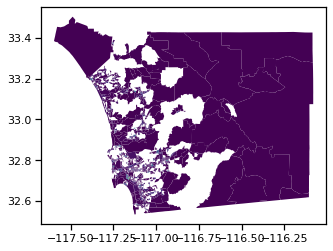

In [144]:
t = pat_sd.groupby('geoid').raw_visit_counts.sum().reset_index()
rvc =  bg[['geoid', 'aland','geometry']].merge(t)
rvc['visit_density'] = rvc.raw_visit_counts / rvc.aland
rvc.to_file("san_diego_pat.geojson", driver='GeoJSON')
rvc.plot(column='visit_density')

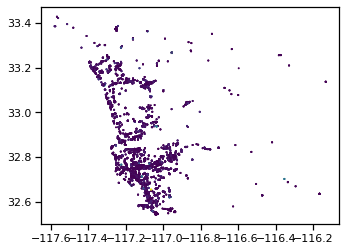

In [202]:
poipat.plot(column='raw_visit_counts', markersize = 1)
poipat.to_file("san_diego_poi.geojson", driver='GeoJSON')

In [147]:
len(pat)

10551

In [151]:
import json 
rows = []
for idx, row in pat.iterrows():
    for cbg, cbg_n in json.loads(row.visitor_home_cbgs).items():
        rows.append([row.placekey, row.geoid, make_geoid(cbg), cbg_n])
len(rows)

visit_home = pd.DataFrame(rows, columns="placekey place_geoid home_geoid visit_count".split())

t = visit_home.groupby('home_geoid').visit_count.sum().to_frame().reset_index()
t = bg[['geoid', 'aland','geometry']].merge(t, left_on='geoid',right_on='home_geoid', how='right')
t = t[~t.geometry.isnull()]

t = t[t.geoid.str.startswith('15000US06073')]
t[]
t.plot(column='visit_count')
t.head()
t.to_file("san_diego_home_bg.geojson", driver='GeoJSON')


In [212]:
rows = []
for idx, row in poipat.iterrows():
    for brand, brand_n in json.loads(row.related_same_month_brand).items():
        rows.append([row.placekey, row.location_name, row.naics_code, row.brands, brand, brand_n])
print(len(rows))

relbrands = pd.DataFrame(rows, 
                         columns="placekey name naics poi_brand rel_brand visit_count".split())


207240


In [279]:
poipat[['naics_code','']]

,naics_code,geoid,raw_visit_counts
1006,722513,15000US060730085111,43656
921,722513,15000US060730065001,29558
1022,722513,15000US060730093042,22194
1292,722513,15000US060730187001,21949
1114,722513,15000US060730133141,21477
...,...,...,...
1217,722513,15000US060730170392,3
1393,722513,15000US060730213041,2
717,722410,15000US060730172002,1
696,722410,15000US060730167012,1


In [213]:
relbrands.head()

,placekey,name,naics,poi_brand,rel_brand,visit_count
0,zzw-22c@5z5-pmb-sqz,Main Chick Hot Chicken,722513,NaN,Starbucks,54
1,zzw-22c@5z5-pmb-sqz,Main Chick Hot Chicken,722513,NaN,McDonald's,47
2,zzw-22c@5z5-pmb-sqz,Main Chick Hot Chicken,722513,NaN,Target,43
3,zzw-22c@5z5-pmb-sqz,Main Chick Hot Chicken,722513,NaN,Westfield,42
4,zzw-22c@5z5-pmb-sqz,Main Chick Hot Chicken,722513,NaN,Jack in the Box,33


In [244]:
t =relbrands.groupby('rel_brand').visit_count.sum().reset_index()
t=t.sort_values('visit_count', ascending=False)
t.visit_count.describe()


count       958.000000
mean       7009.450939
std       43895.489539
min           3.000000
25%          33.000000
50%         100.000000
75%         351.500000
max      540691.000000
Name: visit_count, dtype: float64

In [248]:
t[(t.visit_count > 100) & (t.visit_count<100000)]

,rel_brand,visit_count
141,Carl's Jr.,75676
529,Mobil,68537
899,Vons,54494
151,Chevron Extra Mile,45313
3,76,44844
...,...,...
638,Punch Bowl Social,103
470,La-Z-Boy,103
228,Dog Haus,102
354,Habitat for Humanity ReStore,101


In [257]:
poipat.brands.value_counts().head(30)

Subway                    514
Chevron                   317
ARCO                      306
Shell Oil                 305
Jack in the Box           297
McDonald's                278
Chevron Extra Mile        186
Domino's Pizza            180
Carl's Jr.                162
Jersey Mike's             153
Panda Express             148
Taco Bell                 144
Little Caesars            134
Mobil                     124
KFC                       123
76                        117
Chipotle Mexican Grill    108
Circle K Gas              101
Pizza Hut                  98
Burger King                93
El Pollo Loco              90
Wendy's                    71
Cold Stone Creamery        69
Papa John's                58
In-N-Out Burger            57
We Got It Food Mart        53
Wingstop                   51
Epic Wings N' Things       51
Del Taco                   51
Speedway                   51
Name: brands, dtype: int64

In [266]:
t.sort_values('visit_count', ascending=False).head(30)

,rel_brand,visit_count
764,Starbucks,540691
903,Walmart,484364
516,McDonald's,466906
801,Target,384278
732,Shell Oil,338968
412,Jack in the Box,327622
2,7-Eleven,326294
190,Costco,323825
12,ARCO,323187
150,Chevron,292071
